# 🚚 E-Commerce Order Delivery Time Modeling using Log-Normal Distribution

## 💼 Problem Statement
An e-commerce company wants to model order delivery times to improve logistics and customer communication. 
Since delivery time can't be negative and often follows a skewed distribution due to traffic, distance, and fulfillment center load, the Log-Normal Distribution is ideal.

#### 🔍 Why Log-Normal?
Delivery time = product of many positive random variables (traffic delay × packaging time × shipping distance).

Right-skewed with long tail.

Always positive.

#### 1️⃣ Simulate Delivery Time Data

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import lognorm

np.random.seed(1)

# Log-normal parameters
mu = 2.2       # Mean of the log of delivery time
sigma = 0.4    # Standard deviation of the log

# Simulate delivery times (in days)
delivery_times = lognorm.rvs(sigma, scale=np.exp(mu), size=300)

# Create DataFrame
df = pd.DataFrame({'Delivery_Time_Days': delivery_times})
df.head()


,Delivery_Time_Days
0,17.283256
1,7.066020
2,7.306258
3,5.875626
4,12.758058


In [11]:
print(df.describe())

       Delivery_Time_Days
count          300.000000
mean             9.982790
std              3.886438
min              2.952836
25%              7.125325
50%              9.349049
75%             11.876625
max             24.812071


#### 2️⃣ Visualize the Distribution

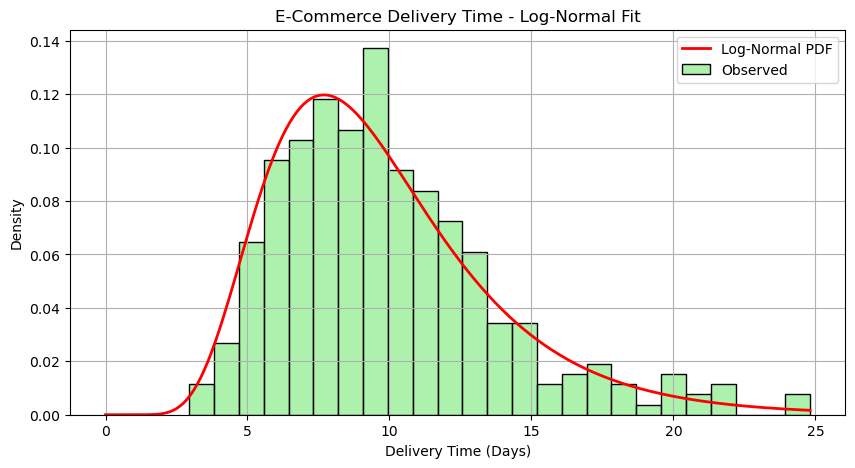

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Delivery_Time_Days'], bins=25, stat='density', color='lightgreen', label='Observed')

x = np.linspace(0, df['Delivery_Time_Days'].max(), 200)
pdf = lognorm.pdf(x, s=sigma, scale=np.exp(mu))
plt.plot(x, pdf, 'r-', label='Log-Normal PDF', lw=2)

plt.title('E-Commerce Delivery Time - Log-Normal Fit')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()


#### 3️⃣ Estimate Key Probabilities

In [19]:
# Probability of delivery within 3 days
p_within_3 = lognorm.cdf(3, s=sigma, scale=np.exp(mu))
print(f"Probability of delivery within 3 days: {p_within_3:.2%}")

# Probability of delivery taking more than 7 days
p_over_7 = 1 - lognorm.cdf(7, s=sigma, scale=np.exp(mu))
print(f"Probability of delivery taking more than 7 days: {p_over_7:.2%}")


Probability of delivery within 3 days: 0.29%
Probability of delivery taking more than 7 days: 73.74%


### 4️⃣ Business Impact

Only ~29% of customers get delivery within 3 days.

Around 74% wait over 7 days, hurting satisfaction.

The company can:

Identify peak delay regions.

Optimize courier routing for regions with long tails.

Set better delivery time expectations.